# ECON 143 Final Project

Amber Shao

## Research on the WTP for Covid-19 Vaccine for different groups of people in China

This final project uses the dataset described in Jianhong Xiao, Yihui Wu, Min Wang, and Zegang Ma (2022). "Scope Issue in Contingent Valuation Studies of the COVID-19 Vaccine: The Case of China" Appl Health Econ Health Policy. 2022; 20(3): 417–429. A copy of this essay can be found online [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8743235/).    

This survey used a double-bounded dichotomous choice method to elicit information on individuals' willingness to pay for the Covid-19 vaccine in China. The entire survey contains three parts: risk perception & attitude towards vaccination, willingness to pay, and individuals' socioeconomic characteristics. However, since this project only focuses on people's WTP from different socioeconomic backgrounds, we use the second and the third part of the survey to conduct the contingent valuation. 

The code section below presents the dataset along with two labels. While the left label demonstrates the WTP data section, the right lebel demonstrates the socioeconomic data section. 

### Background: WTP data section
For the WTP section, The first _scenario_ column includes 9 hypothetical scenarios composed of different levels of vaccine effectiveness, duration of protection, and side effects. The detail of this column is demonstrated by the label on the left attached below the dataframe. The second _yes_ column indicates one's willingness to receive the vaccine. If yes == 1, then this person is willing to receive vaccine; if yes == 0, then no. After understanding the scenario and expressing willingness to receive the vaccine, each sampled individual was first asked whether they would be willing to pay bid0 for the vaccine. The first price asked was randomly chosen to be 0, 50, 100, 200, 300, 500, 1000, or 2000, units in Chinese currency Yuan(¥). If they said "No," they were then asked if they would be willing to pay the bidl price. If they said "Yes," they were asked if they'd be willing to pay the bidh price. The prices initially asked and individuals' responses are recorded as bid0, response 1, and response2. 

For example, for the first surveyed individual, when he is first asked whether he would like to pay ¥1000 for the vaccine, he says no. Then, when he was asked whether he would like to pay ¥500 for the vaccine, he said yes. Therefore, his WTP range is [500,1000). For the second surveyed individual, when she was first asked whether she would like to pay ¥200 for the vaccine, she said yes. Then, when she is asked whether she would like to pay ¥300 for the vaccine, she also says yes. Therefore, his WTP range is [300,$\infty$).

### Background: Socioeconomic data section
There are 10 features asked in the socioeconomic data section. Each with a detailed explaination attached below as the labels on the right. 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from IPython.display import Image
from scipy.stats import norm
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
data = pd.read_excel('Covid Vaccine WTP CN.xlsx', header = 0)
data = data.iloc[:,13:31]
data[0:10]

,scene,yes,response1,response2,bidl,bid0,bidh,age1,age,male,edu,inc2019,work,marriage,children,region,urban,ill
0,9,1,0.0,1.0,500.0,1000.0,2000.0,42,4,1,3,4,0,1,1,1,1,0
1,1,0,NaN,NaN,NaN,NaN,NaN,35,3,0,3,3,0,1,1,1,1,0
2,8,1,1.0,1.0,100.0,200.0,300.0,34,3,0,2,3,0,1,1,3,1,0
3,5,1,1.0,1.0,50.0,100.0,200.0,34,3,0,2,3,0,1,1,3,1,1
4,3,1,1.0,1.0,200.0,300.0,500.0,35,3,0,2,4,0,1,1,3,1,0
5,3,1,1.0,1.0,100.0,200.0,300.0,34,3,1,3,4,0,1,1,1,1,0
6,5,1,1.0,0.0,500.0,1000.0,2000.0,35,3,0,2,3,0,1,1,1,1,0
7,4,1,1.0,0.0,50.0,100.0,200.0,36,3,0,2,3,0,1,0,1,0,0
8,5,1,0.0,0.0,500.0,1000.0,2000.0,36,3,1,3,4,0,1,1,1,1,0
9,8,1,1.0,1.0,100.0,200.0,300.0,34,3,0,2,4,0,0,0,1,1,0


<tr>
    <td> <img src="key%20attributes.jpeg" alt="Drawing" style="width: 400px;"/> </td>
    <td> <img src="subsample.jpeg" alt="Drawing" style="width: 550px;"/> </td>
</tr>

### Section 1. Examine the demography and the Socioeconomic Status of Group Unwilling to Get the Vaccine

From the data analysis computed below, we know that among all the surveyed individuals, 545 of them refuse to be vaccinated regardless. This is approximately 22% of the sample. Suppose we visualize the proportion of different feature groups among the all no vaccination people. In that case, we can see that different feature groups in the no vaccination subsample are approximately the same distribution as in the overall pooled sample. For example, if we look at the pie chart for chronic disease, we might conclude that people without chronic disease are more likely to refuse vaccination because, for people refusing vaccination, 80.2% don't have chronic diseases, while 19.8% have. However, looking at the right labels above, we can see that this 8:2 ratio is the same no:yes ratio (82.7:17.3) in the overall sample. 

In [3]:
# compute the no vaccine sample size and its proportion within the overall pooled sample
no_vac = data[data['yes']==0]
print("Number of people refuse to get the vaccine: " +
      str(len(no_vac.axes[0])))
print("The proportion of these people in the total surveyed sample: " + 
      str(len(no_vac.axes[0])/len(data.axes[0])))

Number of people refuse to get the vaccine: 545
The proportion of these people in the total surveyed sample: 0.22244897959183674


In [4]:
# define the function that can draw pie chart for each feature specified
def categorical_comparison(data, target_feature):
    label_list = np.unique(data[target_feature])
    sizes = []
    for i in label_list:
        sizes.append(sum(data[target_feature] == i))
    colors = ['#D4CDFF','#CEE3FF','#C9FFD9','#FFFECB']
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=label_list, autopct='%1.1f%%', 
           wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
           colors = colors)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    ax.set_title('Composition of different ' + target_feature + 
                 ' group in no vaccination people' )

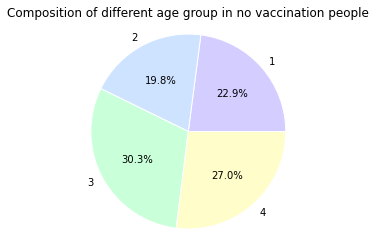

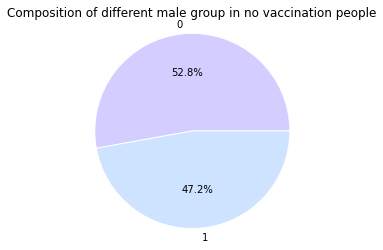

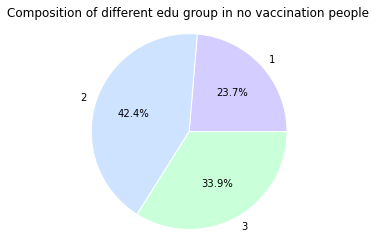

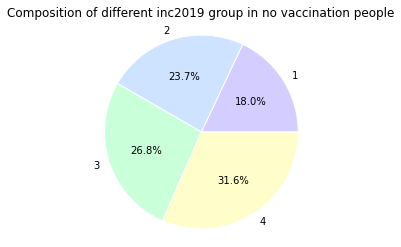

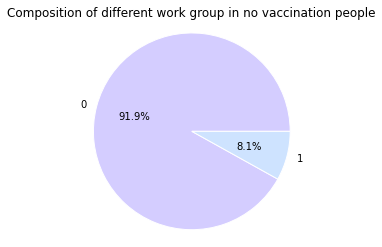

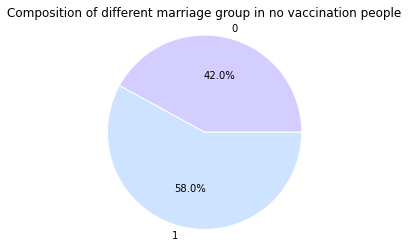

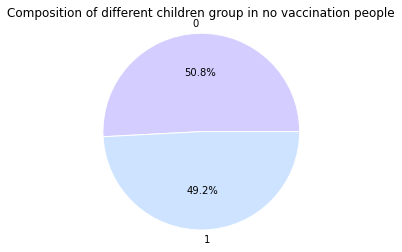

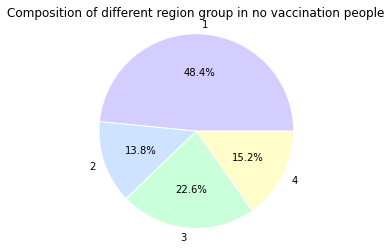

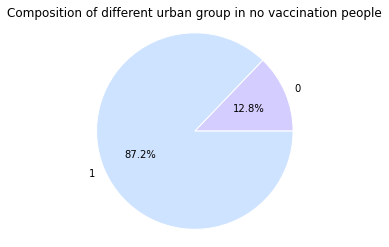

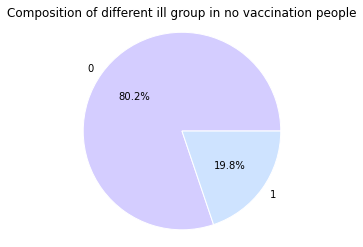

In [5]:
# visualize each features' composition in the no vaccine subsample 
for variables in ['age', 'male','edu','inc2019','work','marriage','children', 'region','urban','ill']:
    categorical_comparison(no_vac, variables)

### Section 2. Examine Willingness-to-Pay in general Using Nonparametric Estimation 

In order to compute the median WTP, we first need to compute individuals' WTP range. Based on the logic discussed in the introduction, we make the following operation: 
- First, we need to list out all 8 possible disjoint interval values $\mathbb{B}$ = {0, 50, 100, 200, 300, 500, 1000, 2000, $\infty$}
- Since each initial asked price is randomly assigned, let $B^{L}_{i}$ be **bidl**, $B^{M}_{i}$ exactly the value of **bid0** and $B^{H}_{i}$ **bidh**. Let $Y_i$ be a household $i$'s true willingness-to-pay for the vaccine, then 
$$ \operatorname{Pr}\left(B_{i}^{L} \leq Y_{i} \leq B_{i}^{M} \mid B_{i}^{L}=b_{j}, B_{i}^{M}=b_{K}\right)=\operatorname{Pr}\left(b_{j} \leq Y_{i} \leq b_{k}\right). $$
- If (1st=0, 2nd=1), this person refuses bid0 but accepts bidl. Therefore, this person's WTP range is [bidl, bid0). 
- If (1st=1, 2nd=0), this person accepts bid0 but refuses bidh. Therefore, this person's WTP range is [bid0, bidh). 
- If (1st=1, 2nd=1), this person accepts both bid0 and bidh. Then, this person's WTP range is [bidh, $\infty$).
- If (1st=0, 2nd=0), this means this person refused both bid0 and bidl. Then, the WTP range will be [0, bidl).

In [6]:
vac = data[data['yes']==1].copy()

vac["LB"] = -9 
vac["UB"] = -9 

# lower bound construction
# yes-yes responders
vac.loc[(vac["response1"]==1) & (vac["response2"]==1), "LB"] = vac["bidh"]

# yes-no responders
vac.loc[(vac["response1"]==1) & (vac["response2"]==0), "LB"] = vac["bid0"]

# no-yes responders
vac.loc[(vac["response1"]==0) & (vac["response2"]==1), "LB"] = vac["bidl"]

# no-no responders
vac.loc[(vac["response1"]==0) & (vac["response2"]==0), "LB"] = 0

# upper bound construction
# yes-yes responders
vac.loc[(vac["response1"]==1) & (vac["response2"]==1), "UB"] = np.inf

# yes-no responders
vac.loc[(vac["response1"]==1) & (vac["response2"]==0), "UB"] = vac['bidh']

# no-yes responders
vac.loc[(vac["response1"]==0) & (vac["response2"]==1), "UB"] = vac['bid0']

# no-no responders
vac.loc[(vac["response1"]==0) & (vac["response2"]==0), "UB"] = vac['bidl']

In [7]:
vac[["response1","response2","bid0","LB","UB"]][0:10]

,response1,response2,bid0,LB,UB
0,0.0,1.0,1000.0,500.0,1000.0
2,1.0,1.0,200.0,300.0,inf
3,1.0,1.0,100.0,200.0,inf
4,1.0,1.0,300.0,500.0,inf
5,1.0,1.0,200.0,300.0,inf
6,1.0,0.0,1000.0,1000.0,2000.0
7,1.0,0.0,100.0,100.0,200.0
8,0.0,0.0,1000.0,0.0,500.0
9,1.0,1.0,200.0,300.0,inf
10,0.0,1.0,1000.0,500.0,1000.0


Since we have 8 disjoint intervals, let D1 = [0,50), D2 = [50,100), D3 = [100,200), ... , D8 = [2000, infinity). Then, we can test whether individuals' willingness to pay fall within each disjoint intervals. If so, the code below will return 1, otherwise, 0. For example, D1=1 indicates this person's WTP is within [0,50); D2=1 indicates this person's WTP is within [50,100), so on and so forth.

Using the first two rows as example, we can see that the first person has 1 for D6, meaning his WTP is within the interval:[500,1000), which is the WTP range listed above.  The second surveyed individual has 1 for D5, D6, D7, and D8. This means that his WTP is within last four intervals: [300,500), [500,1000), [1000,2000), and [2000, $\infty$). Combining these four intervals together, we have [300,$\infty$), which is
listed in the chart above as the second row. 

In [8]:
vac["D1"] = ((vac["LB"]<=0) & (vac["UB"]>=50))*1
vac["D2"] = ((vac["LB"]<=50) & (vac["UB"]>=100))*1
vac["D3"] = ((vac["LB"]<=100) & (vac["UB"]>=200))*1
vac["D4"] = ((vac["LB"]<=200) & (vac["UB"]>=300))*1
vac["D5"] = ((vac["LB"]<=300) & (vac["UB"]>=500))*1
vac["D6"] = ((vac["LB"]<=500) & (vac["UB"]>=1000))*1
vac["D7"] = ((vac["LB"]<=1000) & (vac["UB"]>=2000))*1
vac["D8"] = ((vac["LB"]<=2000) & (vac["UB"]>=np.inf))*1

vac[["D1","D2","D3","D4","D5","D6","D7","D8"]][0:10]

,D1,D2,D3,D4,D5,D6,D7,D8
0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,1,1
3,0,0,0,1,1,1,1,1
4,0,0,0,0,0,1,1,1
5,0,0,0,0,1,1,1,1
6,0,0,0,0,0,0,1,0
7,0,0,1,0,0,0,0,0
8,1,1,1,1,1,0,0,0
9,0,0,0,0,1,1,1,1
10,0,0,0,0,0,1,0,0


After completing the matching between individuals' WTP range and disjoint intervals, we name the resulting chart D and can use the Turnbull's method (EM Algorithm) to optimize our estimation for WTP median. 

Let $F=(F(b_1),F(b_2),\dots,F(b_{L-1}))'$ be the willingness-to-pay CDF values at the $L-1$ interior WTP values for which the survey elicits information. Since the cheaper the vaccine, the more likely people will pay for it, we assume our initial F to be {0.2, 0.4, 0.6, 0.7, 0.8, 0.8, 0.95}, where we temporarily omit our assumption $F(0)=0$ and $F(\infty)=1$.

Given D and F, we can calculate the possibility of one's WTP falls into certain intervals using the function $ \mathbb{E}\left[\mathbf{1}\left(b_{l} \leq Y_{i} \leq b_{l-1}\right) \mid D, F\right]=\frac{D_{i l}\left[F_{l}-F_{l-1}\right]}{\sum_{k=1}^{L} D_{i k}\left[F_{k}-F_{k-1}\right]}$. Using the second row above as an example while assuming a evenly distributed probability among these 8 intervals, we know that 

$$ \mathbb{E}\left[\mathbf{1}\left(300 \leq Y_{i} \leq 500\right) \mid D, F\right] = \mathbb{E}\left[\mathbf{1}\left(500 \leq Y_{i} \leq 1000\right) \mid D, F\right] = \frac{0.1}{0.1+0.1+0.05+0.05} = \frac{1}{3} $$


$$\mathbb{E}\left[\mathbf{1}\left(1000 \leq Y_{i} \leq 2000\right) \mid D, F\right] = \mathbb{E}\left[\mathbf{1}\left(2000 \leq Y_{i} \leq \infty \right) \mid D, F\right] = \frac{0.05}{0.1+0.1+0.05+0.05} = \frac{1}{6}$$

After understanding the logic behind the computation, we can finally write functions to implement it. The E_step function first manipulate F, adding $F(0)=0$ and $F(\infty)=1$ into the CDF array and assign it to a variable called F_star. That is, F_star now contains CDF from to $b_0$ to $b_l$. Then, using the for loop, the E_step function find probability falling in between two distinct point: $F(b_l)-F(b_{l-1})$. For example, if = $F(b_2)$ = 0.4 and $F(b_1)$ = 0.2, E_step here calculate the probability $\operatorname{Pr}\left(b_1 \leq Y_{i} \leq b_2\right) = 0.4-0.2 = 0.2$. Lastly, the E_step function converts 1s in the D table to probabilities, then sums all probabilities in each row to get the probability of that surveyed person falling within his/her WTP's upper and lower bound. Using these probabilities as numerator and denominator, the E_step function eventually returns a table of probabilities measuring how likely individuals fall within certain distinct WTP intervals. Using the first 10 rows of D and the F we assumed, we verify that the E_Step function operate exactly as what we computed above. 

In [9]:
def E_Step(F, D):
    
    """
    F : (F(b1),F(b2),...,F(bL)) willingness-to-pay CDF values, numpy (L-1,) array
    D : N x L matrix of indicators for WTP
    """
    
    L = len(F) + 1           # number of disjoint intervals 
           
    F_star = list(F)         # add 0 and 1 to list of CDF values 
    F_star.insert(0,0)
    F_star.append(1)
    
    F_dif = []               # compute probability assigned to each of the l=1,..,L WTP intervals      
                             # given current value of F
    for l in range(L):
        F_dif.append(F_star[l+1] - F_star[l])     
    
    delta_0  = D * F_dif         # N x L matrix with numerator values for delta_il, i = 1,..,N, l = 1,...,L
    delta_1  = D @ F_dif         # N - vector with denominator values for delta_il, i = 1,..,N
        
    delta = delta_0.T / delta_1  # L x N matrix with posterior probability that each of the i = 1,..,N, 
                                 # units is in the l = 1,...,L bins given the data and current value of F
    return delta.T          

In [10]:
F = np.array([0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95])
D = vac[["D1","D2","D3","D4","D5","D6","D7","D8"]][0:10]
E_Step(F, D)

,D1,D2,D3,D4,D5,D6,D7,D8
0,0.00,0.00,0.00,0.000,0.000000,1.000000,0.000000,0.000000
2,0.00,0.00,0.00,0.000,0.333333,0.333333,0.166667,0.166667
3,0.00,0.00,0.00,0.250,0.250000,0.250000,0.125000,0.125000
4,0.00,0.00,0.00,0.000,0.000000,0.500000,0.250000,0.250000
5,0.00,0.00,0.00,0.000,0.333333,0.333333,0.166667,0.166667
6,0.00,0.00,0.00,0.000,0.000000,0.000000,1.000000,0.000000
7,0.00,0.00,1.00,0.000,0.000000,0.000000,0.000000,0.000000
8,0.25,0.25,0.25,0.125,0.125000,0.000000,0.000000,0.000000
9,0.00,0.00,0.00,0.000,0.333333,0.333333,0.166667,0.166667
10,0.00,0.00,0.00,0.000,0.000000,1.000000,0.000000,0.000000


Once we construct the E-Step function, we can finally use Turnbull's method to estimate the median WTP for vaccination. Turnbull's method first starts with a random set of CDF(F_start), with predetermined max iteration limits(maxiter) and the max bearable difference between two iterations(xtol). The premise of iterations is the preset condition converged = False. First, we enter the while loop, using the E_Step function constructed above to calculate the table of probabilities measuring how likely individuals fall within certain distinct WTP intervals(delta).

Then, we conduct the M-Step by first getting the average probability for each distinct interval(D1-D8) using np.mean(delta). Then, we find the cumulative probability by calling np.cumsum and eliminate the last interval [2000,$\infty$) by applying [0:-1]. Once we have the CDF after E_step(F_em), we find the difference(epsilon) between it and F_start and compare it with xtol to see whether we can end the iteration. If xtol is greater than epsilon or we reach the maxiter, we finish the Turbulls' method by setting the converged = True. By doing so, we prevent our code from entering the next round of iteration since the while condition no longer holds. Therefore, this round's F_em is the optimized CDF found. However, if xtol is less than epsilon, there are still noticeable differences
between each round of iteration, indicating room for improvement and optimization. Therefore, the F_em generated this round becomes the F_start for the next round, keeping iterated(iter += 1) until we reach the first condition.

In [11]:
D = vac[["D1","D2","D3","D4","D5","D6","D7","D8"]]

# starting values for Turnbull algorithm
F_start = np.array([0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95])

finished  = False
converged = False
xtol      = 0.0001
maxiter   = 1000

iter = 0  # initialize iteration counter

while not converged:

    # Print optimization output to screen
    if (iter > 0): 
        print("Iteration = "       + "%.0f" % iter + \
              ",  2-norm of change in F = " + "%.6f" % epsilon)
    
    
    # ----------------------------------------------------------------------#
    # - E-Step: Compute posterior unit-specific WTP bin probabilities      -#
    # ----------------------------------------------------------------------#
    
    delta = E_Step(F_start, D)
    
    # ----------------------------------------------------------------------#
    # - M-Step: Update estimates of WTP distribution.                      -#
    # ----------------------------------------------------------------------#
    
    F_em = np.cumsum(np.mean(delta))[0:-1]
   
    # Assess convergence 
    epsilon = np.linalg.norm(F_start-F_em)
    
    if (epsilon < xtol) | (iter >= maxiter):
            finished = True
            if (epsilon < xtol):
                converged = True
        
    # Update parameters
    F_start = F_em
    iter += 1

Iteration = 1,  2-norm of change in F = 0.755097
Iteration = 2,  2-norm of change in F = 0.139070
Iteration = 3,  2-norm of change in F = 0.036880
Iteration = 4,  2-norm of change in F = 0.014662
Iteration = 5,  2-norm of change in F = 0.007875
Iteration = 6,  2-norm of change in F = 0.004771
Iteration = 7,  2-norm of change in F = 0.003013
Iteration = 8,  2-norm of change in F = 0.001937
Iteration = 9,  2-norm of change in F = 0.001261
Iteration = 10,  2-norm of change in F = 0.000829
Iteration = 11,  2-norm of change in F = 0.000551
Iteration = 12,  2-norm of change in F = 0.000370
Iteration = 13,  2-norm of change in F = 0.000252
Iteration = 14,  2-norm of change in F = 0.000175
Iteration = 15,  2-norm of change in F = 0.000123


After 15 iterations, our epsilon is smaller than our predetermined xtol(0.001). Therefore, we have our final Willingness-to-Pay CDF. 

    wtp      F(y)    S(wtp)
0     0  0.000000  1.000000
1    50  0.009111  0.990889
2   100  0.054626  0.945374
3   200  0.144543  0.855457
4   300  0.229426  0.770574
5   500  0.381917  0.618083
6  1000  0.589970  0.410030
7  2000  0.784009  0.215991


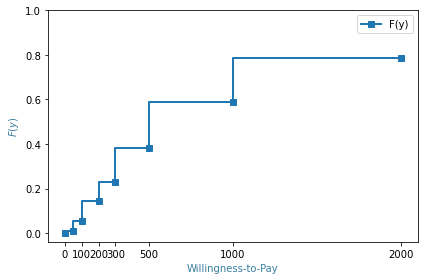

In [12]:
F_em_final = list(F_em).copy()
F_em_final.insert(0,0)
data_em = {"wtp" : [0, 50, 100, 200, 300, 500, 1000, 2000], "F(y)" : F_em_final}
WTP_em = pd.DataFrame.from_dict(data_em)
WTP_em['S(wtp)'] = 1 - WTP_em['F(y)'] 

print(WTP_em)

# Plot estimate WTP survivor function
fig_wtp_cdf, ax = plt.subplots()

WTP_em.plot(x="wtp",y="F(y)", drawstyle="steps", style='s-', linewidth=2, ax=ax)
color = '#3B7EA1' # Founder's Rock
ax.set_xlabel('Willingness-to-Pay', color=color)
ax.set_ylabel(r'$F(y)$', color=color)
ax.set_xticks([0, 100, 200, 300, 500, 1000, 2000])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0])

fig_wtp_cdf.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('fig_wtp_cdf', bbox_inches='tight', dpi=500) 

Visualizing the CDF out with both table and graph, **we can see that the median WTP lays within the interval [500, 1000).** This result really surprises me. Looking back from 2022, when Covid-19 vaccines have 0 costs, I expect people's WTP for the Covid-19 vaccine to be around ¥200-¥300. The CDF distribution also surprises me because less than 25% of people's WTP for the Covid-19 vaccine falls below ¥300. This means that over 75% of people are willing to pay more than ¥300 to receive two vaccine doses. What's even more shocking is more than 50% of people are willing to pay more than ¥500 to receive two doses of vaccine. 

However, after reading [news](https://www.fiercepharma.com/vaccines/china-sinopharm-chief-narrows-down-covid-19-vaccine-price-to-within-145-for-2-dose-regimen#:~:text=Life%20Sciences%20Events-,Sinopharm%20chief%20says%20COVID%2D19%20vaccine%20will%20cost%20less,%24145%20for%202%2Ddose%20regimen) about the Chinese Covid-19 vaccine price expectation released in 2020, I found my estimation of [500,1000) is surprisingly accurate! From pharmaceutical companies' perspective, developing the Covid-19 vaccine in such a short time frame requires substantial human and capital investments, which need to be paid off by selling vaccines to the general public. From the perspective of Chinese citizens back in 2020, Covid-19's transmission and fatality rates are significantly higher than other influenzas. Meanwhile, the lockdown of Wuhan and continuously quarantee in other cities pushed people's panic and worry to the climax. Under such circumstances, the newly developed vaccine could be considered the last resort to get back to normal life. Therefore, the public might be willing to be vaccinated even at a high cost. Thus, the matching of supply side and demand side rationalize this high price expectation of Covid-19 Vaccine. 

After obtained the median WTP in general, I am curious on different groups' median WTPs. Therefore, for the next section, I will first use the probit model, looking for 2 respondent attributes that contributes to individuals' WTP. Then, I will further examine the median WTPs for each subgroup categorized by these attributes. 

### Section 3. Identify Key Respondent Attributes For Willingness-to-Pay Using Parametric Estimation

In [13]:
# Obtain the second price asked using the following logic:
# if response1=0, then the surveyed individual refuses bid0, 
# this means PT2=bidl
# if response1=1, then the surveyed individual accepts bid0, 
# this means PT2=bidh
PT2 = []
for i in vac.index:
    if vac.loc[i,:]['response1'] == 1:
        price2 = vac.loc[i,:]['bidh']
    else:
        price2 = vac.loc[i,:]['bidl']
    PT2.append(price2)
vac['PT2'] = PT2

In [14]:
# Conduct Probit regression usong income and gender 
mod = smf.probit('response2 ~ inc2019+male+PT2', data = vac).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.607968
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              response2   No. Observations:                 1905
Model:                         Probit   Df Residuals:                     1901
Method:                           MLE   Df Model:                            3
Date:                Fri, 13 May 2022   Pseudo R-squ.:                 0.02731
Time:                        23:36:23   Log-Likelihood:                -1158.2
converged:                       True   LL-Null:                       -1190.7
Covariance Type:            nonrobust   LLR p-value:                 4.946e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5659      0.081      6.996      0.000       0.407       0.724
inc2019        0.0715      0.027      2.696      0.007       0.020       0.124
male          -0.1250      0.062     -2.015      0.044      -0.247      -0.003
PT2           -0.0004   5.59e-05     -7.547      0.000      -0.001      -0.000
==============================================================================
"""

I choose income and gender among all these variables to conduct further analysis. For income, people with higher income may be willing to pay more for vaccines to make themselve better protected. Therefore, I predict a positive relationship between income and individuals' WTP. For gender, females' immune systems may be biologically weaker than males'. Therefore, compared with males, they are more concerned about the severe effect caused by Covid-19. Thus, females are willing to pay more for the vaccine. Consequently, I predict a negative relationship between gender and individuals' WTP since females are labeled 0 and males are labeled 1.  

Using the Probit model constructed, $Y_i = \beta_0 + \beta_1Income + \beta_2gender+e_i$, we have 

\begin{equation} \label{eq1}
\begin{split}
Pr(Y_i=1|X_i) & = Pr(WTP \ge PT2) \\
 & = Pr(\beta_0 + \beta_1Income + \beta_2gender+e_i \ge PT2) \\ 
 & = Pr(\beta_0 + \beta_1Income + \beta_2gender-PT2 \ge -e_i) \\
 & = Pr(\frac{\beta_0 + \beta_1Income + \beta_2gender-PT2}{\sigma} \ge -\frac{e_i}{\sigma}) \\
 & = Pr(-\frac{e_i}{\sigma} \le \frac{\beta_0}{\sigma} + \frac{\beta_1Income}{\sigma} + \frac{\beta_2gender}{\sigma} - \frac{PT2}{\sigma})
\end{split}
\end{equation}

Constructing Probit regression, we can see that our prediction is correct. While income has a positive coefficient 0.0715, gender has a negative coefficient -0.1250. Both coefficients have p < 0.05, indicating their statistical significance. 

Having income and gender as our respondent attributes, we can choose specific subsamples based these two respondent attributes

### Section 4. Compute Median Willingness-to-Pay for Different Subsamples using Parametric Estimation

Obtained the coefficients for the intercept term, income, gender, and PT2, we can calculate the cdf of any price given using the following formula:

\begin{equation} \label{eq1}
\begin{split}
F_{WTP}(PT2) & = Pr(WTP_i \le PT2) \\
 & = Pr(\beta_0+\beta_1Income+\beta_2gender+e_i \le PT2) \\ 
 & = Pr(\beta_0+\beta_1Income+\beta_2gender-PT2 \le -e_i) \\
 & = Pr(-e_i \le -\beta_0-\beta_1Income+-beta_2gender+PT2) \\
 & = \phi(-\frac{\beta_0}{\sigma} - \frac{\beta_1Income}{\sigma} - \frac{\beta_2gender}{\sigma} + \frac{PT2}{\sigma})
\end{split}
\end{equation}

Therefore, we can calculate the CDF for specific subsamples using the function cdf_calculation. This function takes two arguments: variable and subgroup. While the variable measures the targeted column, the subgroup measures the specific subgroup within this column. For example, if we are interested in the median WTP for people whose income is higher than or equal to ¥8000, we first check the right labels on the top to check the subgroup number. Once we know it is 4, we assign variable = "inc2019" and subgroup = 4 to compute this group's WTP CDF. 

Unlike the nonparametric estimation done in section 2, where we can only estimate CDF at boundary values, one of the advantages of parametric estimation is that we can estimate any CDF points given price2. Therefore, I define several functions to find the median WTP for each subsample by finding the corresponding price2. 

Here is the detailed procedure. First, I define a separate function called **cdf** to calculate this group's WTP CDF given price2. Given CDF at the boundary values, we can easily find the interval where the median WTP lays. For example, For subsample income=4, its median WTP(0.5) lies between 0.360136 and 0.525204, which corresponds to [1000, 2000) price interval. Once we have this interval, we can feed each number in the interval into the CDF function to see whether this price corresponds to the median WTP. To make this process more interactive, I created a widget slider with an initial start value of the price closest to the median. This price is obtained by calling the **find_nearest** function defined earlier. The slider's input is price2, and its output is the corresponding WTP CDF. Audiences can slide through all the numbers within the targeted interval and stop at the median one. 

In [15]:
def find_nearest(cdf, pt2, value = 0.5):
    # this function first finds the index of the closest cdf to the median value 0.5
    # then this function returns the corresponding price2 using the index obtained
    # for example, pt2 = 50, 100, 200, 300, 500, 1000, 2000
    # and cdf  0.224121, 0.230476, 0.243481, 0.256872, 0.284762, 0.360136, 0.525204
    # the closest CDF is 0.525204; corresponsing index = 6
    # this function will return pt2[6], which is 2000
    cdf = np.asarray(cdf)
    idx = (np.abs(cdf - value)).argmin() 
    return pt2[idx]

In [16]:
def cdf_calculation(variable, subgroup, percentile=0.5):
    #delta = coeffecients obtained from the probit regression 
    #data = subsampled data using assigned variable and subgroup
    # income = subsample's income values
    #gender = subsample's gender values
    #pt2 = disjoint interval boundaries listed in nonparametric estimation part
    #y = the resulting CDF
    
    delta = mod.params    
    data = vac[vac[variable]==subgroup]   
    income = (data[["inc2019"]] * delta['inc2019']).astype('float64') 
    gender = (data[["male"]] * delta['male']).astype('float64') 
    pt2= [50,100,200,300,500,1000,2000]                                                               
    y = [(norm.cdf(-delta.iloc[0]-income.values-gender.values-
                   wtp_sample*delta['PT2']).mean()) for wtp_sample in pt2]
    print(pd.DataFrame({"PT2":pt2, "F(y)": y}))
    
    def cdf(price2):
        return norm.cdf(-delta.iloc[0]-income.values-gender.values-price2*delta['PT2']).mean()
    
    interact(cdf, price2=pt2[pt2.index(find_nearest(y, pt2, percentile))-1]);

In [17]:
cdf_calculation('inc2019', 4)

    PT2      F(y)
0    50  0.224121
1   100  0.230476
2   200  0.243481
3   300  0.256872
4   500  0.284762
5  1000  0.360136
6  2000  0.525204


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

In [18]:
cdf_calculation('inc2019', 3)

    PT2      F(y)
0    50  0.241436
1   100  0.248054
2   200  0.261576
3   300  0.275466
4   500  0.304289
5  1000  0.381534
6  2000  0.547700


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

In [19]:
cdf_calculation('inc2019', 2)

    PT2      F(y)
0    50  0.261247
1   100  0.268143
2   200  0.282204
3   300  0.296612
4   500  0.326390
5  1000  0.405463
6  2000  0.572253


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

In [20]:
cdf_calculation('inc2019', 1)

    PT2      F(y)
0    50  0.282566
1   100  0.289733
2   200  0.304317
3   300  0.319218
4   500  0.349894
5  1000  0.430576
6  2000  0.597351


interactive(children=(IntSlider(value=500, description='price2', max=1500, min=-500), Output()), _dom_classes=…

In [21]:
cdf_calculation('male', 1)

    PT2      F(y)
0    50  0.265567
1   100  0.272510
2   200  0.286661
3   300  0.301152
4   500  0.331076
5  1000  0.410379
6  2000  0.576985


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

In [22]:
cdf_calculation('male', 0)

    PT2      F(y)
0    50  0.236343
1   100  0.242876
2   200  0.256229
3   300  0.269956
4   500  0.298469
5  1000  0.375065
6  2000  0.540705


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

Using the **cdf_calculation** function, audiences can examine WTP for any subsamples for any percentile. For example, the slider below expresses the 70th percentile WTP for people with medical related work experience. 

In [23]:
cdf_calculation('work', 1, 0.7)

    PT2      F(y)
0    50  0.241925
1   100  0.248534
2   200  0.262037
3   300  0.275906
4   500  0.304681
5  1000  0.381775
6  2000  0.547565


interactive(children=(IntSlider(value=1000, description='price2', max=3000, min=-1000), Output()), _dom_classe…

### Section 5. Limits and Conclusion 

All in all, this project researches Chinese citizens' willingness to pay for the Covid-19 vaccine back in 2020. We first examine the demography and socioeconomic status of people refusing to receive the vaccination. After finding out that the socioeconomic distribution within these no-vaccine people is approximately the same as within the overall pooled sample, we shift our attention to finding the median WTP in general using nonparametric estimation. Using Turbull's estimation, we find out people's WTP median lies within the [500, 1000) interval, which surprises me since this high price contrasts sharply with the current 0 cost Covid-19 vaccine. Acknowledging nonparametric estimation's limits, we use the probit model to construct parametric estimation for different subgroups' WTP using two variables income and gender. We first build a probit regression to ensure these two variables indeed contribute to people's different WTP: both variables have $p \le 0.05$, which means this result is statistically significant. Then, we compute each subgroup's median WTP using the probit model. 

Looking at these estimations, we find that people's median WTP lies within [500,1000) for nonparametric estimation. However, for parametric estimation, people's median WTP lies within [1000,2000) regardless of the minor differences. From a personal perspective, this difference can be explained by the pros and cons of these two methods. For the nonparametric estimation method, its result accuracy high depends on the initial F value passed into the E-step. If the F passed in is way off from the true CDF distribution, and we don't have enough iteration to change it gradually, the resulting CDF might differ from the true parameter. 

Regardless of the shortcoming of the nonparametric method, the limit of the parametric estimation can also cause this difference. For parametric estimation, if the distribution assumption is violated, the true relationship between price and variables is not linear, then the results are not reliable. For future improvement, when constructing the probit model, maybe we can do model selection using empirical risk minimization to find the best fit polynomial function for the dependent and independent variables. Then, we can calculate the WTP using the function discovered. 

Also, if we pay attention to the data acquisition channel, we can see that this data is collected via an online survey platform called Wenjuanxing. This method implies that this survey is only accessible to people with internet/mobile device access. That is, the sample selected may disproportionally represent the high-income community, causing a sample selection bias. This bias may explain such high WTP estimated for both nonparametric and parametric methods. For future improvement, researchers could collect online and offline data to make the dataset more representative. 

### Section 6. Credit and Citation 

Graham Bryan, Gao Mengsi. Econ 143 Problem Set 2 Contigent Valuation

Liu, Angus. “Sinopharm Chief Says Covid-19 Vaccine Will Cost Less than $145 for 2-Dose Regimen.” Fierce Pharma, 18 Aug. 2020 

Xiao, Jianhong et al. “Scope Issue in Contingent Valuation Studies of the COVID-19 Vaccine: The Case of China.” Applied health economics and health policy vol. 20,3 (2022): 417-429. doi:10.1007/s40258-021-00706-9